In [68]:
import sys
sys.path.insert(1, '../')

import os
import argparse
import wandb
import tensorflow as tf

from models import Phase1Model
from solvers import Phase1Solver
import utils
from data_loaders import MNIST

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Load the dataset into the data object
data = MNIST(normalization=True)

[1]
[3]
[5]
[7]
[2]
[0]
[13]
[15]
[17]
[4]


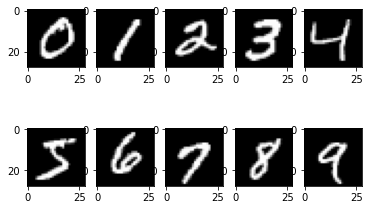

In [44]:
# Plot an ordered sample of handwritten digits (and their index)
X = data.training_data
y = data.training_labels

fig, ax = plt.subplots(2, 5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(y == i)[0]
    print(im_idx)
    plottable_image = np.reshape(X[im_idx], (28, 28))
    # ax[i].imshow(plottable_image, cmap='gray_r')
    ax[i].imshow(plottable_image)

In [37]:
# Load the trained and saved model
model_path = '../saved_models/phase1'
model = tf.keras.models.load_model(model_path, compile=False)
model.summary()

Model: "phase1_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
le_net_encoder (LeNetEncoder multiple                  2572      
_________________________________________________________________
le_net_classifier (LeNetClas multiple                  59134     
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
_________________________________________________________________


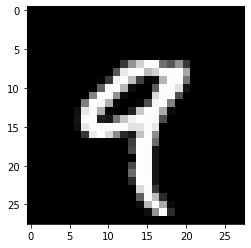

In [61]:
# Select an image to be classified by the model
img = X[4]
plottable_image = np.reshape(img, (28, 28))
plt.gray()
plt.imshow(plottable_image)
plt.show()

In [62]:
# Verify the label associated to the training datapoint
label = y[4]
y[4]

9

In [63]:
# Expand dimensions to [1, 28, 28, 1]
img = np.reshape(img, (1, 28, 28, 1))
np.shape(img)

(1, 28, 28, 1)

In [64]:
# Replicate the image expanding the dimensions to [2, 28, 28, 1]
# Why? Because TensorFlow doesn't like a single input; so a replication is needed.
img = np.tile(img, [2, 1, 1, 1])
np.shape(img)

(2, 28, 28, 1)

In [67]:
# Let's make a class prediction for the selected image
logits, preds = model(img, training=False)

# Extract the maximun value of the class probabilities
prediction = tf.argmax(preds, -1)
print('Class: {}'.format(prediction[0]))
print('Predictions: {}'.format(preds[0]))

Class: 9
Predictions: [0.0853522  0.08535517 0.08535301 0.08535518 0.08539654 0.08535264
 0.08535179 0.08538155 0.08537047 0.2317314 ]
